<a href="https://colab.research.google.com/github/aalr007/MAAM/blob/main/A2c_DL_TC5033_AD2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> ***Métodos Avanzados de Aprendizaje Máquina*** </center>
## <center> ***Equipo 38*** </center>
## <center> ***Activity 2C*** </center>
### Profesor: Dr José Antonio Cantoral Cevallos
### Alumnos:
* Luis Alfredo Negron Naldos A01793865
* Javier Muñoz Barrios A01794423
* Aurelio Antonio Lozano Rábago A01081266

#### <p style='text-align: right;'> Octubre del 2023 </p>


# TC 5033
## Deep Learning
## Transfer Learning

<br>

#### Activity 2c: Exploring Transfer Learning with CIFAR-10
<br>

- Objective:

    In this activity, you'll study the concept of Transfer Learning, a powerful technique to improve the performance of your models by leveraging pre-trained architectures. The provided notebook offers a complete solution using a specific pre-trained model on the CIFAR-10 dataset. Your task is to extend this by trying out two other pre-trained models.
    
- Instructions:

    This activity should be submitted in the same format as previous activities. Remember to include the names of all team members in a markdown cell at the beginning of the notebook. The grade obtained in this notebook will be averaged with that of Activity 2b, for the grade of Activity 2.    

    Study the Provided Code: The provided notebook has a complete Transfer Learning solution using a particular pre-trained model. Make sure you understand the flow of the code and the role of each component.

    Select Two Other Pre-trained Models: Choose two different pre-trained models available in PyTorch's model zoo.

    Apply Transfer Learning: Add cells to implement Transfer Learning using the two models you've chosen. Train these models on the CIFAR-10 dataset.

    Evaluation: After training, evaluate your models' performance. Compare the results with the provided solution and try to interpret why there might be differences.

    Documentation: In a markdown cell, summarize your findings. Include any challenges you faced, how you overcame them, and any interesting insights you gained from comparing the different pre-trained models.

- Note:

    Although the provided code serves as a guide, you're encouraged to implement the new solutions on your own. The goal is to reinforce your understanding of Transfer Learning and how to apply it effectively.




In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torch.utils.data import sampler #Helps making  samples
import torchvision.datasets as datasets # Database sets and datasets
import torchvision.transforms as T # Helps to make Transformations
from torchvision import models # Pre-trained Models

In [2]:
import matplotlib.pyplot as plt

### Descargar sets de datos

In [32]:
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/cifar-10/cifar-10-batches-py'
DATA_PATH = 'sample_data/Cifar10/'
NUM_TRAIN = 45000 #training images
MINIBATCH_SIZE = 64 # validation
#resize 224x224px
transform_imagenet = T.Compose([
                T.Resize(224),
                T.ToTensor(),
                T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
            ])
cifar_mean = [0.491, 0.482, 0.447] # well known parameters. RGB
cifar_std = [0.247, 0.243, 0.261] # well known parameters. RGB
transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize(cifar_mean, cifar_std)
            ])

# Training set loader
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_imagenet)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

# Validation set loader
cifar10_val = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                           transform=transform_imagenet)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, len(cifar10_val))))

# Testing set loader
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_imagenet)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [34]:
for i, (x, y) in enumerate(val_loader):
    print(i, x.shape, y.shape)

0 torch.Size([64, 3, 224, 224]) torch.Size([64])
1 torch.Size([64, 3, 224, 224]) torch.Size([64])
2 torch.Size([64, 3, 224, 224]) torch.Size([64])
3 torch.Size([64, 3, 224, 224]) torch.Size([64])
4 torch.Size([64, 3, 224, 224]) torch.Size([64])
5 torch.Size([64, 3, 224, 224]) torch.Size([64])
6 torch.Size([64, 3, 224, 224]) torch.Size([64])
7 torch.Size([64, 3, 224, 224]) torch.Size([64])
8 torch.Size([64, 3, 224, 224]) torch.Size([64])
9 torch.Size([64, 3, 224, 224]) torch.Size([64])
10 torch.Size([64, 3, 224, 224]) torch.Size([64])
11 torch.Size([64, 3, 224, 224]) torch.Size([64])
12 torch.Size([64, 3, 224, 224]) torch.Size([64])
13 torch.Size([64, 3, 224, 224]) torch.Size([64])
14 torch.Size([64, 3, 224, 224]) torch.Size([64])
15 torch.Size([64, 3, 224, 224]) torch.Size([64])
16 torch.Size([64, 3, 224, 224]) torch.Size([64])
17 torch.Size([64, 3, 224, 224]) torch.Size([64])
18 torch.Size([64, 3, 224, 224]) torch.Size([64])
19 torch.Size([64, 3, 224, 224]) torch.Size([64])
20 torch.S

### Usar GPU

In [35]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cuda


### Mostrar imágenes

La imagen muestreada representa un: Bird


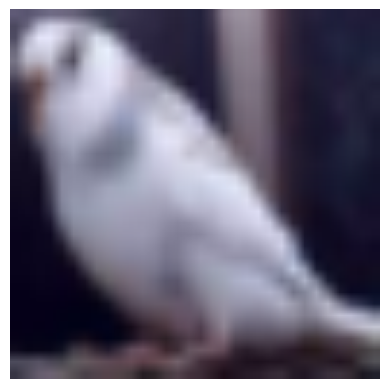

In [36]:
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def plot_figure(image):
    plt.imshow(image.permute(1,2,0))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)

### Calcular Accuracy

In [37]:
def accuracy(model, loader):
    num_correct = 0
    num_total = 0
    model.eval()
    model = model.to(device=device)
    with torch.no_grad():
        for (xi, yi) in loader:
            xi = xi.to(device=device, dtype = torch.float32)
            yi = yi.to(device=device, dtype = torch.long)
            scores = model(xi) # mb_size, 10
            _, pred = scores.max(dim=1) #pred shape (mb_size )
            num_correct += (pred == yi).sum() # pred shape (mb_size), yi shape (mb_size, 1)
            num_total += pred.size(0)
        return float(num_correct)/num_total



### Cargar modelo pre-cargado

In [39]:
model_resnet18 = models.resnet18(pretrained=True)

In [63]:
# Using GoogLeNet
model_GoogLeNet = models.GoogLeNet()

/usr/local/lib/python3.10/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


In [ ]:
# Using AlexNet

model_AlexNet = models.alexnet(pretrained=True)

#### Exploremos el modelo

Exploring ResNet

In [66]:
for i, w in enumerate(model_resnet18.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([64, 3, 7, 7]) False
1 torch.Size([64]) False
2 torch.Size([64]) False
3 torch.Size([64, 64, 3, 3]) False
4 torch.Size([64]) False
5 torch.Size([64]) False
6 torch.Size([64, 64, 3, 3]) False
7 torch.Size([64]) False
8 torch.Size([64]) False
9 torch.Size([64, 64, 3, 3]) False
10 torch.Size([64]) False
11 torch.Size([64]) False
12 torch.Size([64, 64, 3, 3]) False
13 torch.Size([64]) False
14 torch.Size([64]) False
15 torch.Size([128, 64, 3, 3]) False
16 torch.Size([128]) False
17 torch.Size([128]) False
18 torch.Size([128, 128, 3, 3]) False
19 torch.Size([128]) False
20 torch.Size([128]) False
21 torch.Size([128, 64, 1, 1]) False
22 torch.Size([128]) False
23 torch.Size([128]) False
24 torch.Size([128, 128, 3, 3]) False
25 torch.Size([128]) False
26 torch.Size([128]) False
27 torch.Size([128, 128, 3, 3]) False
28 torch.Size([128]) False
29 torch.Size([128]) False
30 torch.Size([256, 128, 3, 3]) False
31 torch.Size([256]) False
32 torch.Size([256]) False
33 torch.Size([256, 2

In [41]:
model_resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Exploring GoogLeNet

In [55]:
#Model 2
for i, w in enumerate(model_GoogLeNet.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64, 64, 1, 1]) True
4 torch.Size([64]) True
5 torch.Size([64]) True
6 torch.Size([192, 64, 3, 3]) True
7 torch.Size([192]) True
8 torch.Size([192]) True
9 torch.Size([64, 192, 1, 1]) True
10 torch.Size([64]) True
11 torch.Size([64]) True
12 torch.Size([96, 192, 1, 1]) True
13 torch.Size([96]) True
14 torch.Size([96]) True
15 torch.Size([128, 96, 3, 3]) True
16 torch.Size([128]) True
17 torch.Size([128]) True
18 torch.Size([16, 192, 1, 1]) True
19 torch.Size([16]) True
20 torch.Size([16]) True
21 torch.Size([32, 16, 3, 3]) True
22 torch.Size([32]) True
23 torch.Size([32]) True
24 torch.Size([32, 192, 1, 1]) True
25 torch.Size([32]) True
26 torch.Size([32]) True
27 torch.Size([128, 256, 1, 1]) True
28 torch.Size([128]) True
29 torch.Size([128]) True
30 torch.Size([128, 256, 1, 1]) True
31 torch.Size([128]) True
32 torch.Size([128]) True
33 torch.Size([192, 128, 3, 3]) True
34 torch.Size([192]) 

Exploring AlexNet

In [104]:
#Model 2
for i, w in enumerate(model_AlexNet.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([64, 3, 11, 11]) False
1 torch.Size([64]) False
2 torch.Size([192, 64, 5, 5]) False
3 torch.Size([192]) False
4 torch.Size([384, 192, 3, 3]) False
5 torch.Size([384]) False
6 torch.Size([256, 384, 3, 3]) False
7 torch.Size([256]) False
8 torch.Size([256, 256, 3, 3]) False
9 torch.Size([256]) False
10 torch.Size([4096, 9216]) False
11 torch.Size([4096]) False
12 torch.Size([4096, 4096]) False
13 torch.Size([4096]) False
14 torch.Size([1000, 4096]) False
15 torch.Size([1000]) False


#### Ajustar a nuestro modelo

Adjusting ResNet

In [105]:
model_aux = nn.Sequential(*list(model_resnet18.children()))
model_aux

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [106]:
model_aux = nn.Sequential(*list(model_resnet18.children())[:-1])

In [107]:
model_aux

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

Adjusting GoogLeNet

In [108]:
model_aux2 = nn.Sequential(*list(model_GoogLeNet.children()))
model_aux2 = nn.Sequential(*list(model_GoogLeNet.children())[:-1])
model_aux2

Sequential(
  (0): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (5): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (bra

Adjusting AlexNet

In [109]:
model_aux3 = nn.Sequential(*list(model_AlexNet.children()))
# model_aux3 = nn.Sequential(*list(model_AlexNet.children())[:-1])
model_aux3

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): AdaptiveAvgPool2d(output_size=(6, 6))
  (2): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplac

Setting train flag to false, so we can train only the last layer

In [110]:
for i, parameter in enumerate(model_aux.parameters()):
    parameter.requires_grad = False

for i, parameter in enumerate(model_aux2.parameters()):
    parameter.requires_grad = False

for i, parameter in enumerate(model_aux3.parameters()):
    parameter.requires_grad = False

In [111]:
for i, parameter in enumerate(model_aux.parameters()):
    print(i, parameter.requires_grad)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False


In [112]:
for i, parameter in enumerate(model_aux2.parameters()):
    print(i, parameter.requires_grad)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


In [113]:
for i, parameter in enumerate(model_aux3.parameters()):
    print(i, parameter.requires_grad)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False


### Loop de entrenamiento

In [114]:
def train(model, optimiser, epochs=100):
#     def train(model, optimiser, scheduler = None, epochs=100):
    model = model.to(device=device)
    for epoch in range(epochs):
        for i, (xi, yi) in enumerate(train_loader):
            model.train()
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)

            cost = F.cross_entropy(input= scores, target=yi)

            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

        acc = accuracy(model, val_loader)
#         if epoch%5 == 0:
        print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy: {acc},')
#         scheduler.step()

In [119]:
hidden1 = 256
hidden = 256
lr = 5e-4
epochs = 5

# model1 = nn.Sequential(nn.Flatten(),
#                        nn.Linear(in_features=32*32*3, out_features=hidden1), nn.ReLU(),
#                        nn.Linear(in_features=hidden1, out_features=hidden), nn.ReLU(),
#                        nn.Linear(in_features=hidden, out_features=10))

# Using RestNet
model1 = nn.Sequential(model_aux,
                       nn.Flatten(),
                       nn.Linear(in_features=512, out_features= 10, bias= True))
# # Using GoogLeNet
# model2 = nn.Sequential(model_aux2,
#                        nn.Flatten(),
#                        nn.Linear(in_features=1024, out_features= 10, bias= True))
# # Using AlexNet
# model_AlexNet.classifier[6] = nn.Linear(4096,1000)
# model3 = nn.Sequential(model_aux3,
#                        nn.Flatten(),
#                        nn.Linear(in_features=9216, out_features=4096, bias= True),
#                        nn.Linear(in_features=4096, out_features=1024, bias= True),
#                        nn.Linear(in_features=1024, out_features=10, bias= True))

optimiser = torch.optim.Adam(model1.parameters(), lr=lr, betas=(0.9, 0.999))
# optimiser2 = torch.optim.Adam(model2.parameters(), lr=lr, betas=(0.9, 0.999))
# optimiser3 = torch.optim.SDG(model3.parameters(), lr=0.001, momenum=0.9)

Let's copare our different models:

Training ResNet

In [118]:
train(model1, optimiser, epochs)

Epoch: 0, costo: 0.7356866598129272, accuracy: 0.7828,
Epoch: 1, costo: 0.7323437929153442, accuracy: 0.7948,
Epoch: 2, costo: 0.5598592162132263, accuracy: 0.8038,
Epoch: 3, costo: 1.091930627822876, accuracy: 0.8042,
Epoch: 4, costo: 0.9431225061416626, accuracy: 0.8064,


In [122]:
model1

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

Training GoogLeNet

In [123]:
model_aux = nn.Sequential(*list(model_GoogLeNet.children())[:-1])

In [124]:
train(model1, optimiser, epochs)

Epoch: 0, costo: 0.40828070044517517, accuracy: 0.7872,
Epoch: 1, costo: 1.0227402448654175, accuracy: 0.7988,
Epoch: 2, costo: 0.5628149509429932, accuracy: 0.8008,
Epoch: 3, costo: 0.5918734073638916, accuracy: 0.8058,
Epoch: 4, costo: 0.5010215640068054, accuracy: 0.8056,


In [128]:
model1

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [127]:
accuracy(model1, test_loader)

0.8029

Training AlexNet

In [129]:
model_aux = nn.Sequential(*list(model_AlexNet.children())[:-1])

In [130]:
train(model1, optimiser, epochs)

Epoch: 0, costo: 0.729094386100769, accuracy: 0.807,
Epoch: 1, costo: 0.9018909335136414, accuracy: 0.8066,
Epoch: 2, costo: 1.6307501792907715, accuracy: 0.8096,
Epoch: 3, costo: 0.9949808120727539, accuracy: 0.8112,
Epoch: 4, costo: 1.3837809562683105, accuracy: 0.8098,


In [131]:
model1

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [132]:
accuracy(model1, test_loader)

0.8058

Test using Resnet34

In [ ]:
model_resnet34 = models.resnet34(pretrained=True)
model_aux = nn.Sequential(*list(model_resnet34.children())[:-1])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 198MB/s]


In [ ]:
train(model1, optimiser, epochs)

Epoch: 0, costo: 0.5247305631637573, accuracy: 0.8028,
Epoch: 1, costo: 0.650072455406189, accuracy: 0.802,
Epoch: 2, costo: 0.34240978956222534, accuracy: 0.8062,


In [ ]:
accuracy(model1, test_loader)

0.8075

Test Using Vgg16

In [ ]:
model_vgg = models.vgg16(pretrained=True)
model_aux = nn.Sequential(*list(model_vgg.children())[:-1])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 216MB/s]


In [ ]:
train(model1, optimiser, epochs)

Epoch: 0, costo: 0.9023522138595581, accuracy: 0.8096,
Epoch: 1, costo: 0.10088510066270828, accuracy: 0.8096,
Epoch: 2, costo: 0.7199468612670898, accuracy: 0.813,


In [ ]:
accuracy(model1, test_loader)

0.8097

## Conclusion:

Let's evaluate our results:

Model --------- Accuracy

GoogLeNet------ 0.8029

AlexNet-------- 0.8058

Resnet34------- 0.8075

**Vgg16---------- 0.8097**



In our test results, we found a big difference in the Vgg16 Model compare to others we tested with a 0.8097 of accuracy.

One of our biggest challenges was to comprehend some of the models we added in this project.

We learned some of the transfer learning benefits using pytorch like the improved training speed by using pre-trained models that learned important features from large datasets, saving computational resources for training.
Its important to state, that we found that transfer learning helps to laverage previous knoledge and applied to some domain-specific cases with ease.


